In [14]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from scipy.stats import ttest_ind
from itertools import combinations
import seaborn as sns
from scipy.spatial.distance import euclidean
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))
    
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'

In [15]:
phase3_collection = unpickle_this('phase3collection.pkl')

## Exploratory calls

All set to analyze


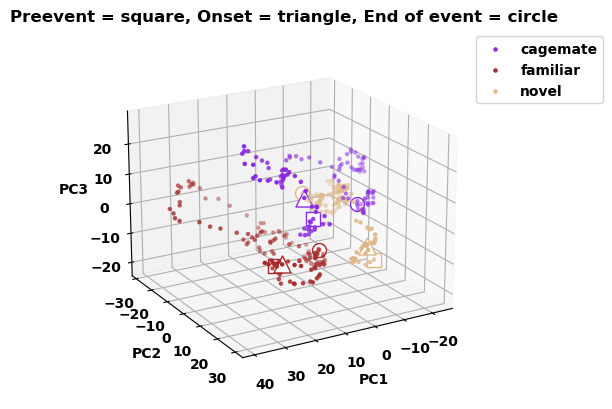

0.25379010254487144
0.4213036790724369
0.558368498390962
0.6450827654991941
0.6980234229841951
0.7472119089864179
0.785005332174086
0.8170344491581613
0.8372965340981202
0.8535294080959377
0.8679356128802265
0.8802977001441705
0.8921729704118676
0.9020572115186632


In [16]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 50, ignore_freq=0.5, smoothing_window = 500)
pc_dict = pca_analysis.PCA_trajectories(5,1, events = ['cagemate', 'familiar', 'novel'], d = 3, azim = 60)
#geo_dis = pca_analysis.LOO_PCA(2,2,0.9, events = ['acquisition', 'familiar', 'novel', 'cagemate'])
var = pc_dict['explained variance']
total_var = 0
for varl in var[0:14]: 
    total_var =+ total_var + varl
    print(total_var)

All set to analyze


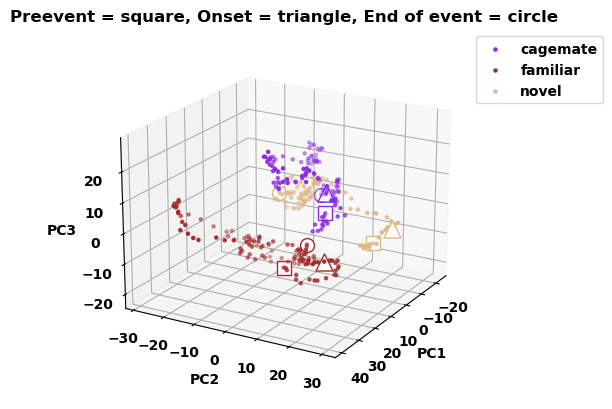

0.25379010254487144
0.4213036790724369
0.558368498390962
0.6450827654991941
0.6980234229841951
0.7472119089864179
0.785005332174086
0.8170344491581613
0.8372965340981202
0.8535294080959377
0.8679356128802265
0.8802977001441705
0.8921729704118676
0.9020572115186632


In [17]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 50, ignore_freq=0.5, smoothing_window = 500)
pc_dict = pca_analysis.PCA_trajectories(5,1, events = ['cagemate', 'familiar', 'novel'], d = 3)
#geo_dis = pca_analysis.LOO_PCA(2,2,0.9, events = ['acquisition', 'familiar', 'novel', 'cagemate'])
var = pc_dict['explained variance']
total_var = 0
for varl in var[0:14]: 
    total_var =+ total_var + varl
    print(total_var)

All set to analyze


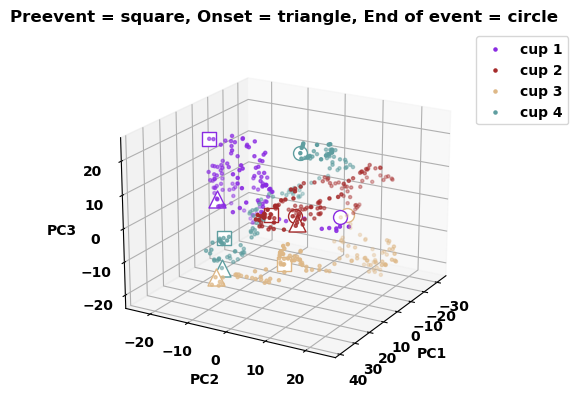

0.25139588711559774
0.4066807090593485
0.529084519727221
0.600749116718413
0.6522720673979339
0.6976549424980791
0.7326479667763693
0.7659445537853992
0.79183093808388
0.8116738970097795
0.8277546789098476
0.8414479908075299
0.8539617624635706
0.8641493440660918
0.8734493806675652
0.8824122849404276
0.8910040903217726
0.8986725270455636
0.9050785031017036


In [18]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 50, ignore_freq=0.5, smoothing_window = 500)
pc_dict = pca_analysis.PCA_trajectories(5,1, events = ['cup 1', 'cup 2', 'cup 3', 'cup 4'], d = 3)
#geo_dis = pca_analysis.LOO_PCA(2,2,0.9, events = ['acquisition', 'familiar', 'novel', 'cagemate'])
var = pc_dict['explained variance']
total_var = 0
for varl in var[0:19]: 
    total_var =+ total_var + varl
    print(total_var)

## PCA trajectroy plotting

All set to analyze
cagemate
familiar
novel
[0.24539901 0.15790097 0.12306036]


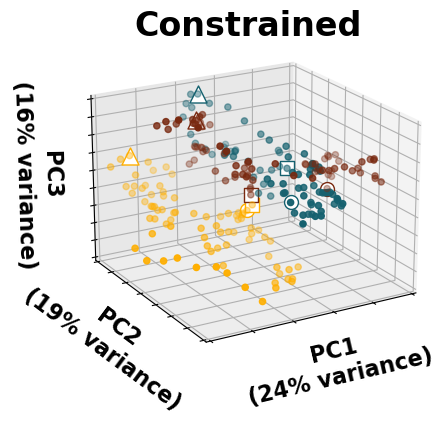

In [19]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection,
                                                  timebin = 100,
                                                  ignore_freq = 0.5, 
                                                  smoothing_window = 500)
pc_dict = pca_analysis.PCA_trajectories(equalize = 5,pre_window= 3, d = 3, events = ['cagemate', 'familiar', 'novel'], plot = False)
equalize = 5

pre_window = 3
post_window = 0
PCA_matrix = pc_dict['transformed data']
timebin = 100
PCA_key = pc_dict['labels']
color_id_dict = {'novel': hex_2_rgb('#15616F'), 
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                  'long-term familiar': hex_2_rgb('#792910')}
event_lengths = int(
        (equalize + pre_window + post_window) * 1000 / timebin
    )
event_end = int((equalize + pre_window) * 1000 / timebin)
pre_window = pre_window * 1000 / timebin
post_window = post_window * 1000 / timebin
colors = [hex_2_rgb('#792910'),  (1.0, 0.6862745098039216, 0.0), hex_2_rgb('#15616F')]
col_counter = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in range(0, len(PCA_key), event_lengths):
    print(PCA_key[i])
    event_label = PCA_key[i]
    onset = int(i + pre_window - 1)
    end = int(i + event_end - 1)
    post = int(i + event_lengths - 1)
    ax.scatter(
        PCA_matrix[i : i + event_lengths, 0],
        PCA_matrix[i : i + event_lengths, 1],
        PCA_matrix[i : i + event_lengths, 2],
        label=event_label,
        s=20,
        color=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[i, 0],
        PCA_matrix[i, 1],
        PCA_matrix[i, 2],
        marker="s",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[onset, 0],
        PCA_matrix[onset, 1],
        PCA_matrix[onset, 2],
        marker="^",
        s=150,
        c="w",
        edgecolors=colors[col_counter],
    )
    ax.scatter(
        PCA_matrix[end, 0],
        PCA_matrix[end, 1],
        PCA_matrix[end, 2],
        marker="o",
        s=100,
        c="w",
        edgecolors=colors[col_counter],
    )
    if post_window != 0:
        ax.scatter(
            PCA_matrix[post, 0],
            PCA_matrix[post, 1],
            PCA_matrix[post, 2],
            marker="D",
            s=100,
            c="w",
            edgecolors=colors[col_counter],
        )
    col_counter += 1
#ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_xlim(-20, 30)
ax.set_ylim(-10, 25)
ax.set_zlim(-20, 25)
ax.view_init(azim = 60, elev =20)
ax.set_title("Constrained", fontsize = 24, y= 1)
ax.set_xlabel("PC1\n(24% variance)", fontsize = 16)
ax.set_ylabel("PC2\n(19% variance)", fontsize = 16)
ax.set_zlabel("PC3\n(16% variance)", fontsize = 16)
ax.tick_params(labelsize = 0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.yaxis.pane.set_alpha(0.9)
ax.xaxis.pane.set_alpha(0.9)
ax.zaxis.pane.set_alpha(0.9)
print(pc_dict['explained variance'][0:3])
plt.savefig('pca_phase3.png', dpi = 600, transparent = True)
plt.show()


## Geodesic Distances

In [20]:
pca_analysis = spike.SpikeAnalysis_MultiRecording(phase3_collection, timebin = 100,ignore_freq = 0.5, smoothing_window = 500)
avg_geo_dis = pca_analysis.avg_geo_dist(5,3, 0.9,events = ['familiar', 'cagemate', 'novel'] )
avg_geo_dis_df = pd.DataFrame.from_dict(avg_geo_dis)
#acg_val = avg_geo_dis_df.mean()
#combined_index = avg_geo_dis_df.index.get_level_values("Outer") + avg_geo_dis_df.index.get_level_values("Inner")
#avg_geo_dis_df.index = combined_index
avg_geo_dis_df.columns.to_list()
avg_geo_dis_df.columns = ['cage vs novel', 'cage vs recall', 'nov vs recall']
avg_vals_df = avg_geo_dis_df.mean()
avg_vals = avg_vals_df.values.tolist()

avg_sems = avg_geo_dis_df.sem()
avg_sems = avg_sems.values.tolist()


All set to analyze


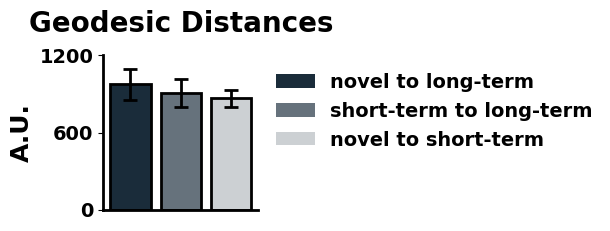

In [28]:
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
color_id_dict = {'novel to long-term': hex_2_rgb('#1a2c3a'),  
                'short-term to long-term': hex_2_rgb('#66727c'),
                'novel to short-term': hex_2_rgb('#ccd0d3')
                }
hatches = ['','','']  
plt.figure(figsize= (2,2))           
plt.bar(color_id_dict.keys(), avg_vals, yerr = avg_sems,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(600))
plt.ylim(0,1200)
plt.title('Geodesic Distances', fontsize = 20, y = 1.1)
plt.savefig('phase3_geodist.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()



In [22]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
p_values = []
for pair in combinations(avg_geo_dis_df.columns, 2):
    t_stat, p_value = ttest_rel(avg_geo_dis_df[pair[0]], avg_geo_dis_df[pair[1]])
    p_values.append(p_value)


adjusted_p_values = multipletests(p_values, method='holm')
adjusted_p_values

(array([False, False, False]),
 array([0.92271887, 0.69002043, 0.92271887]),
 0.016952427508441503,
 0.016666666666666666)

## Trajectory Lengths

In [23]:


def trajectory_length(pca_matrix, key):
    trajectory_lengths = []
    event_order = []
    unique_values, counts = np.unique(key, return_counts=True)
    event_len = counts[0]
    for j in range(0, len(key), event_len):
        trajectory_length = 0
        for i in range(event_len-1):
            trajectory_length = trajectory_length + euclidean(
                pca_matrix[j+i, :],
                pca_matrix[j+i+1, :])
        trajectory_lengths.append(trajectory_length)
        event_order.append(key[j])
    return [trajectory_lengths, event_order]

trajectory_lengths = []
orders= []
for recording in phase3_collection.collection.keys():
    pc_dict = pca_analysis.PCA_matrix_generation(5, 3,
                                                 post_window = 0,
                                                 events = ['cagemate',
                                                           'familiar',
                                                           'novel'],
                                                recordings = [recording])
    [traj_len, event_order] = trajectory_length(pc_dict['transformed data'],
                                            pc_dict['labels'])
    trajectory_lengths.append(traj_len)
    orders.append(event_order)
trajectory_lengths = np.array(trajectory_lengths)

print(trajectory_lengths.shape)

means = np.mean(trajectory_lengths, axis = 0)
sems = sem(trajectory_lengths, axis = 0)

print(orders[0])
print(means)
means = means[[2,1,0]]
sems = sems[[2,1,0]]


(8, 3)
['cagemate', 'familiar', 'novel']
[233.56531958 255.30069282 220.27906496]


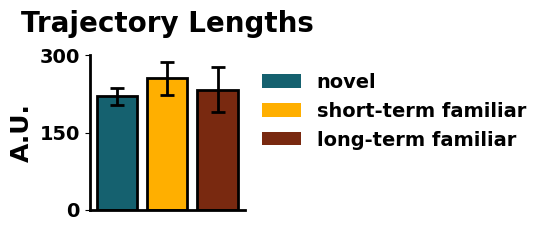

In [24]:
color_id_dict = {'novel': hex_2_rgb('#15616F'), 
                'short-term familiar': (1.0, 0.6862745098039216, 0.0),
                  'long-term familiar': hex_2_rgb('#792910')}
hatches = ['','','']  
plt.figure(figsize= (2,2))  
x = [0.5,1,1.5]         
plt.bar(x, means, yerr = sems,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'],
            capsize = 5, linewidth = 2,
            error_kw={'elinewidth': 2, 'capthick': 2},
            width = .4)
plt.xticks([],rotation=45)
legend_handles = [Patch(facecolor=color, label=label) for label, color in color_id_dict.items()]
plt.legend(handles=legend_handles,
           bbox_to_anchor=(1,1),
           frameon= False, fontsize = 14)
plt.ylabel('A.U.', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Trajectory Lengths', fontsize = 20, y = 1.1)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(150))
plt.ylim(0,300)
plt.savefig('phase3_trajlen.png', dpi = 600, transparent = True, bbox_inches='tight')
plt.show()


In [25]:
orders[0]

['cagemate', 'familiar', 'novel']

In [26]:
trajectory_lengths.shape

(8, 3)

In [27]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
p_values = []
pairs = []
agent_index = {'cagemate' : 0 , 'familiar' : 1, 'novel': 2}
for pair in combinations(orders[0], 2):
    t_stat, p_value = ttest_rel(
        trajectory_lengths[:, agent_index[pair[0]]], 
        trajectory_lengths[:, agent_index[pair[1]]])
    p_values.append(p_value)
    pairs.append(pair)

print(pairs)
adjusted_p_values = multipletests(p_values, method='holm')
adjusted_p_values

[('cagemate', 'familiar'), ('cagemate', 'novel'), ('familiar', 'novel')]


(array([False, False, False]),
 array([1.        , 1.        , 0.79225632]),
 0.016952427508441503,
 0.016666666666666666)